# Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
import sklearn.model_selection

import torch
import torch.nn as nn
from torch.nn.functional import one_hot
from torch.utils.data import DataLoader, TensorDataset

# Data Overview

* Name: Unique identifier for each automobile.

* MPG: Fuel efficiency measured in miles per gallon.

* Cylinders: Number of cylinders in the engine.

* Displacement: Engine displacement, indicating its size or capacity.

* Horsepower: Power output of the engine.

* Weight: Weight of the automobile.

* Acceleration: Capability to increase speed, measured in seconds.

* Model Year: Year of manufacture for the automobile model.

* Origin: Country or region of origin for each automobile.

In [2]:
#read the CSV file in pandas dataframe

df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
#view the shape of data

print("Number of instances", df.shape[0])
print("Number of features", df.shape[1])

Number of instances 398
Number of features 9


# EDA & Visualizations

In [4]:
#checking the missing values

print(df.isna().sum())
df = df.dropna()
df = df.reset_index(drop=True)

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [5]:
#data types of the columns 

df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [6]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [7]:
#replacing the type of data in column "origin" to int64

df.replace({'origin':{"usa": 1 , "japan": 2 ,"europe":3,}},inplace=True)
df.origin.dtype

dtype('int64')

In [8]:
# statistical info describes the numerical data 

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.548469
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.772082
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Car brands in the dataset

In [9]:
df.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [10]:
# editing the column to be just the name of car's brand 

df['name'] = df['name'].apply(lambda x: x.split(' ')[0])

df.name.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [11]:
# editing typos in names of cars to be correct

df.replace({'name':{"maxda":"mazda" , 
                        "toyouta":"toyota" ,"vokswagen":"volkswagen",
                        "vw":"volkswagen","mercedes-benz":"mercedes",
                        "chevroelt":"chevrolet","chevy":"chevrolet"}},inplace=True)

In [12]:
#the top 15 car brans represted in the dataset

names = df.name.value_counts().head(15)
names

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
Name: name, dtype: int64

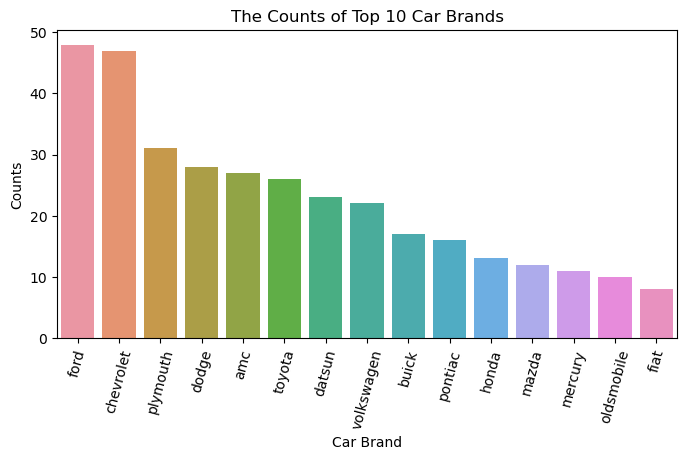

In [13]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
plt.title("The Counts of Top 10 Car Brands")
plt.ylabel('Counts')
plt.xlabel('Car Brand')

sns.barplot(x=names.index, y= names.values);

## Correlation between all features

In [14]:
# Computing pairwise correlation of all features

correlation = df.corr()
correlation 

/tmp/ipykernel_21/723122101.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.474800
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.556302
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.594314
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.447330
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.521609
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.264409
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.066892
origin,0.474800,-0.556302,-0.594314,-0.447330,-0.521609,0.264409,0.066892,1.000000


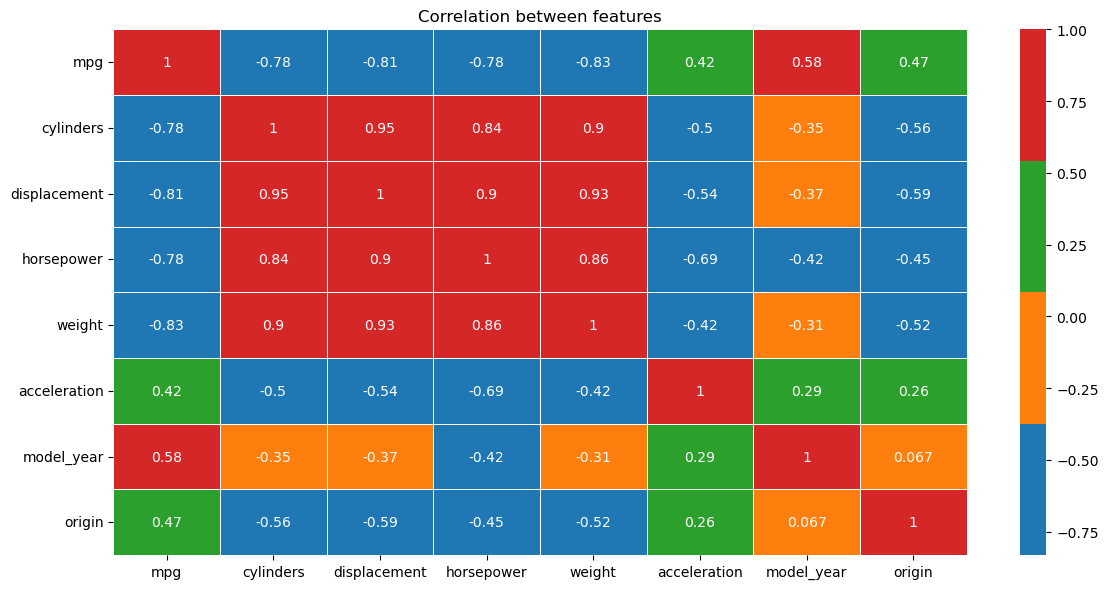

In [15]:
# Correlation heat map

color_palette = sns.color_palette(n_colors=4)
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, cmap=color_palette, linewidths=0.5)
plt.title("Correlation between features")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Building Regression Model

Regression model will be builded to predict the Fuel efficiency measured in miles per gallon (mpg) using the features provided:

'name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration' ,'model_year', 'origin'

## Splitting data 

In [16]:
#splitting the data into train and test sets

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8, random_state=1)

## Feature normalization 

In [17]:
train_stats = df_train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
model_year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
origin,313.0,1.568690,0.781954,1.0,1.0,1.0,2.0,3.0


In [18]:
#Normalization

numeric_column_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
    
df_train_norm.tail()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
203,toyota,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,2
255,amc,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,chevrolet,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,chevrolet,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,chevrolet,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


***The pandas DataFrame that we created via the previous code snippet contains five columns with values of the type float. These columns will constitute the continuous features.***

Next, let’s group the rather fine-grained model year (model_year) information into buckets to simplify the learning task for the model that we are going to train later. Concretely, we are going to assign each car into one of four year buckets: 
**bucket = {(0) if year<73 ,(1) if 73≤year<76 ,(2) if 76≤year<79 ,(3) if  year≥79}**


In [19]:
boundaries = torch.tensor([73, 76, 79])
 
v = torch.tensor(df_train_norm['model_year'].values)
df_train_norm['model_year_bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['model_year'].values)
df_test_norm['model_year_bucketed'] = torch.bucketize(v, boundaries, right=True)

numeric_column_names.append('model_year_bucketed')

The one-hot-encoding approach will be used on the categorical feature (origin) in order to convert it into the dense format

then, the encoded feature will be concatenated with the other numerical features

In [20]:
total_origin = len(set(df_train_norm['origin']))

origin_encoded = one_hot(torch.from_numpy(df_train_norm['origin'].values) % total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)

x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
 
origin_encoded = one_hot(torch.from_numpy(df_test_norm['origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)

x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

Next, the target tensors will be created "mpg"

In [21]:
y_train = torch.tensor(df_train_norm['mpg'].values).float()
y_test = torch.tensor(df_test_norm['mpg'].values).float()

## Loading the data into the DataLoaders

In [22]:
train_ds = TensorDataset(x_train, y_train)

batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

## Sequential Model 

In [23]:
hidden_units = [8, 4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

The model has two fully conected layers, the first has 8 units and the second has 4 units.

In [24]:
#MSE loss function
loss_fn = nn.MSELoss()

#stochastic gradient descent for optimization
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Training loop

In [25]:
torch.manual_seed(1)
num_epochs = 220
log_epochs = 20 
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')

Epoch 0  Loss 534.6137
Epoch 20  Loss 8.3557
Epoch 40  Loss 7.8325
Epoch 60  Loss 7.4631
Epoch 80  Loss 6.9501
Epoch 100  Loss 6.8576
Epoch 120  Loss 6.4664
Epoch 140  Loss 6.6617
Epoch 160  Loss 6.8274
Epoch 180  Loss 6.2876
Epoch 200  Loss 6.0872


After 200 epochs, the train loss was around 5. We can now evaluate the regression performance of the trained model on the test dataset. To predict the target values on new data points, we can feed their features to the model

## Model Evaluation 

In [26]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 20.9787
Test MAE: 3.5520


The MSE on the test set is 9.6, and the mean absolute error (MAE) is 2.1

# References

Most of code snippet in this notebook quoted from book "Machine Learning with PyTorch and Scikit-Learn Book" By Sebastian Raschka , Yuxi (Hayden) Liu , Vahid Mirjalili

link: https://www.packtpub.com/product/machine-learning-with-pytorch-and-scikit-learn/9781801819312

**Thank you for reading my notebook, If you liked it, please upvote**